In [1]:
import sys, os

import jax
import jax.numpy as jnp
import optax
import numpy as np
import math
from matplotlib import pyplot as plt
from jax_tqdm import scan_tqdm
from functools import partial
from jax.tree_util import tree_map
from dataclasses import dataclass
import eindex.array_api as EX
import einops

from jaxtorch import nn
from jaxtorch import PRNG, Context
import jaxtorch

from my_little_optimizer.optim import SpaceItem, Optim
from my_little_optimizer.util import Partial

/home/em/Dev/neural/curvefitthing/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Adaptive HMC warmup: 100%|██████████| 100/100 [00:03<00:00, 25.79it/s]


Finished first warmup with ε=[0.00187382 0.02656088 0.05336699 0.03511192] and L=[2000  425  183  728], d=[5.412909 8.240033 9.668633 5.790886], logp=[-27.99624  -33.961407 -20.257349 -29.693651]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:04<00:00, 20.68it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.5991838 , 0.60194206, 0.5776874 , 0.5881989 ], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.00705658, 0.07497195, 0.12296109, 0.06168816], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.06697017, 0.7115183 , 1.1669573 , 0.58544904], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.00273583, 0.05575826, 0.07406566, 0.03797571], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.00234345, 0.01628714, 0.03958119, 0.03203861], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:04<00:00, 24.76it/s]


Finished second warmup with ε=[0.2477077  0.12328471 0.12328471 0.08111306] and L=[1031 1212 1596  890], d=[4676.2207   376.65973  182.39757  157.55779], logp=[-26.594845 -28.596186 -21.54949  -30.568962]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:03<00:00, 26.39it/s]


acceptance rate: 0.35099167
{'x': Array(-0.79121137, dtype=float32)}
means: (100,) [-0.721227   -0.7225621  -0.7237222  -0.72506756 -0.72684395 -0.7285972
 -0.7314761  -0.7352478  -0.73891556 -0.74256957 -0.7459205  -0.7493568
 -0.75275666 -0.75592613 -0.759021   -0.7626014  -0.7658399  -0.76881814
 -0.7719297  -0.77541685 -0.7795171  -0.78370804 -0.78797257 -0.79227674
 -0.7962299  -0.79891807 -0.8018904  -0.80497044 -0.80851126 -0.81222534
 -0.8161177  -0.82029015 -0.8243387  -0.8279757  -0.83176243 -0.83561003
 -0.83957535 -0.843777   -0.84810203 -0.8523102  -0.85648835 -0.86063635
 -0.8647606  -0.86897606 -0.87346524 -0.8782624  -0.88320667 -0.8880493
 -0.8928825  -0.8976687  -0.9018142  -0.90567577 -0.9095046  -0.9132775
 -0.91711813 -0.92118406 -0.9253018  -0.92948437 -0.9337262  -0.9379881
 -0.9421751  -0.9464389  -0.9508038  -0.9552403  -0.95965755 -0.9640768
 -0.96856046 -0.9731981  -0.9779624  -0.98272866 -0.9875756  -0.9924237
 -0.9971293  -1.0020951  -1.0071983  -1.0122486 

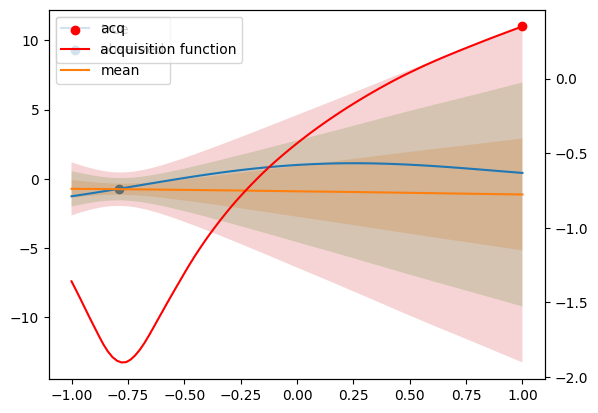

Adaptive HMC warmup: 100%|██████████| 100/100 [00:03<00:00, 26.04it/s]


Finished first warmup with ε=[0.02656088 0.01149757 0.06135904 0.06135904] and L=[ 365 1253  425  324], d=[7.8526034 8.775859  5.888397  6.8163433], logp=[-27.416191 -22.5387   -21.253906 -31.53592 ]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:02<00:00, 33.46it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.42493287, 0.43139488, 0.48918992, 0.4503264 ], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.05281062, 0.02920601, 0.16902995, 0.16820365], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.05478852, 0.03798373, 0.8139176 , 0.21301882], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.03794848, 0.02221471, 0.03068587, 0.07631094], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.01670337, 0.00666273, 0.01824134, 0.03810447], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:04<00:00, 24.52it/s]


Finished second warmup with ε=[0.57223713 0.1072267  0.03053854 0.16297501] and L=[ 425 1091  708  345], d=[1376.2157 3291.687    56.6258  126.8546], logp=[-35.249123 -30.094551 -27.48527  -25.533014]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:02<00:00, 38.24it/s]


acceptance rate: 0.40894604
{'x': Array(1., dtype=float32)}
means: (100,) [-0.70780265 -0.7062036  -0.7042604  -0.69933814 -0.69382447 -0.6883725
 -0.68312454 -0.6775726  -0.6719973  -0.6664269  -0.660795   -0.65497595
 -0.64903146 -0.6434563  -0.6374996  -0.63109165 -0.6244291  -0.6174443
 -0.6101767  -0.6029447  -0.5950068  -0.5865497  -0.57770604 -0.5686975
 -0.55956465 -0.5506972  -0.54191536 -0.53288627 -0.5238227  -0.51488715
 -0.5053356  -0.49570295 -0.4858358  -0.47599655 -0.46601588 -0.45590803
 -0.44579512 -0.4356747  -0.42543983 -0.41522127 -0.40479565 -0.39411893
 -0.38321385 -0.37226358 -0.36129257 -0.35022512 -0.33908287 -0.32801262
 -0.31699136 -0.30586442 -0.2944642  -0.28267527 -0.27069253 -0.25871435
 -0.24643329 -0.23273613 -0.21879295 -0.20484969 -0.1909758  -0.17711833
 -0.16317211 -0.14919382 -0.13525434 -0.12139925 -0.1076292  -0.0938015
 -0.07977019 -0.06536458 -0.05001218 -0.03474524 -0.01930028 -0.00396507
  0.01125108  0.02632169  0.04116698  0.05599046  0.07

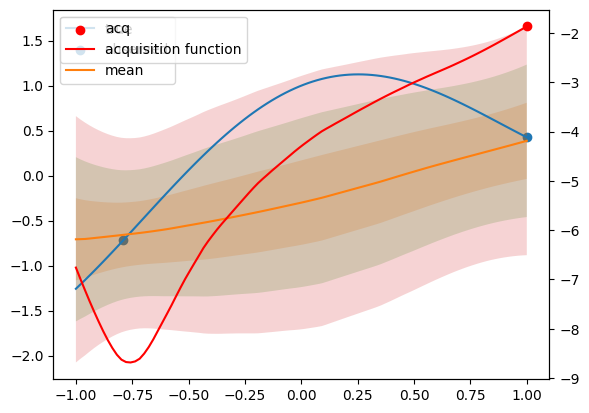

Adaptive HMC warmup: 100%|██████████| 100/100 [00:05<00:00, 19.46it/s]


Finished first warmup with ε=[0.00432876 0.01747529 0.00376494 0.01321941] and L=[1636  829 1535  567], d=[0.9920107 1.1568576 2.4419158 1.6782992], logp=[-14.8490095 -10.982413  -14.575602  -28.287016 ]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:05<00:00, 18.85it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.4126236 , 0.57939315, 0.50512314, 0.41446313], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.01015566, 0.00465193, 0.00951818, 0.02699756], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.01029004, 0.00568506, 0.01214661, 0.03201169], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.00431296, 0.00268233, 0.00438039, 0.01745096], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.00137576, 0.00123222, 0.0020741 , 0.00867477], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:05<00:00, 18.91it/s]


Finished second warmup with ε=[0.16297501 0.09326035 0.09326035 0.01747529] and L=[1838 1919 2000 2000], d=[1633.1727  1996.839    479.98953   94.50255], logp=[ -1.7961829 -10.718189  -17.978252   -7.405157 ]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:06<00:00, 15.32it/s]


acceptance rate: 0.10262135
{'x': Array(1., dtype=float32)}
means: (100,) [-0.9292539  -0.9066478  -0.88400745 -0.8614419  -0.83894986 -0.8164599
 -0.7940886  -0.77525264 -0.7580488  -0.7408441  -0.7236062  -0.7064262
 -0.68929756 -0.6721126  -0.6548683  -0.63771987 -0.62056816 -0.6033399
 -0.5861108  -0.5688822  -0.5516932  -0.5344991  -0.5173165  -0.5004996
 -0.48556763 -0.4705902  -0.45543745 -0.43568325 -0.41738796 -0.3990909
 -0.38092795 -0.363814   -0.35106364 -0.33831167 -0.3255546  -0.3128107
 -0.29986107 -0.28667644 -0.27335328 -0.2599853  -0.24644187 -0.23292784
 -0.2196765  -0.20660625 -0.1935536  -0.1803869  -0.16712914 -0.15376863
 -0.14038733 -0.1269137  -0.11343367 -0.09999188 -0.08667078 -0.07323896
 -0.05972384 -0.04620251 -0.0326241  -0.01896715 -0.00533379  0.00830151
  0.02196704  0.03566333  0.04934622  0.063015    0.07668509  0.09035581
  0.10402954  0.11769956  0.13136218  0.1450248   0.15868036  0.17238882
  0.18461841  0.19398788  0.20335057  0.21248983  0.2213

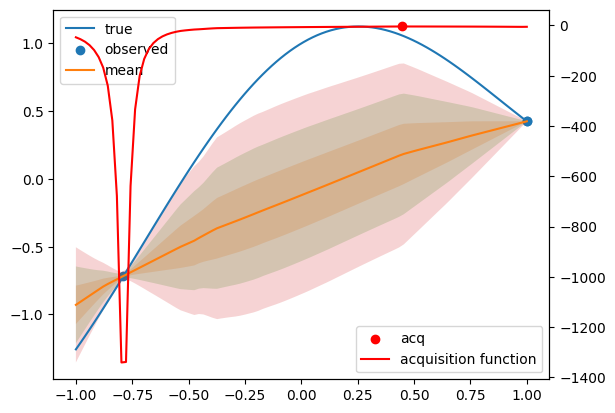

Adaptive HMC warmup: 100%|██████████| 100/100 [00:04<00:00, 24.87it/s]


Finished first warmup with ε=[0.01321941 0.06135904 0.07054803 0.04037016] and L=[345 789 123 567], d=[9.58417    1.9927653  6.498316   0.99532646], logp=[-27.979534 -17.51901  -25.25374  -24.127861]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:01<00:00, 50.70it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.3025084 , 0.32482916, 0.31042892, 0.4404367 ], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.07947967, 0.00468822, 0.19173017, 0.00247789], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.11041609, 0.0122239 , 0.2579625 , 0.00282222], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.05340254, 0.00317099, 0.10190623, 0.00225083], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.01365209, 0.00102754, 0.04330494, 0.0012885 ], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:03<00:00, 25.19it/s]


Finished second warmup with ε=[0.6579334  0.18738174 0.05336699 0.2477077 ] and L=[ 829 1394 1031 1798], d=[1069.4966  2406.5525   228.58792 2027.243  ], logp=[-26.48353  -13.811575 -27.753988 -27.059088]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:04<00:00, 22.91it/s]


acceptance rate: 0.11418512
{'x': Array(0.41335225, dtype=float32)}
means: (100,) [-1.4311998  -1.3617126  -1.2929956  -1.2248831  -1.1560365  -1.0871071
 -1.0178981  -0.94873637 -0.8796739  -0.81068    -0.7419995  -0.6733669
 -0.6046494  -0.5360946  -0.46750402 -0.39886916 -0.33012596 -0.26172855
 -0.19354995 -0.1253636  -0.0572681   0.01077804  0.07842796  0.14573286
  0.21287078  0.2800948   0.34725466  0.41442198  0.48130625  0.5476578
  0.6134857   0.67849576  0.74282086  0.8061197   0.86796707  0.9261775
  0.97986674  1.0308839   1.0794564   1.1252489   1.1687299   1.2115837
  1.2533042   1.2941238   1.3336444   1.3624929   1.3763162   1.3795059
  1.38264     1.3857542   1.3889096   1.3873162   1.3764977   1.3655965
  1.3543744   1.3426535   1.330623    1.3180707   1.3032131   1.2879798
  1.2724121   1.256697    1.2409143   1.2246768   1.2069547   1.1888534
  1.1705928   1.1520548   1.1333567   1.1145713   1.0956072   1.0760757
  1.0557811   1.0348      1.0136757   0.99252194  0.

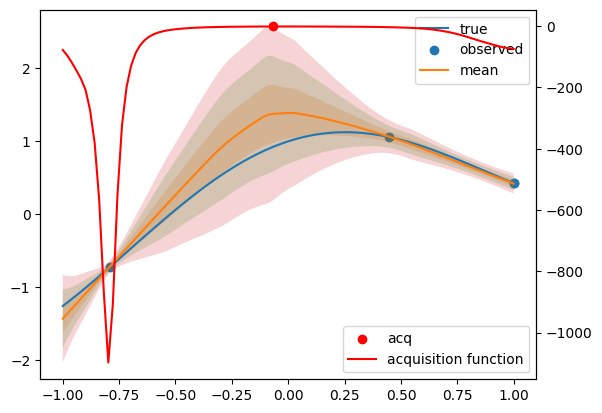

Adaptive HMC warmup: 100%|██████████| 100/100 [00:05<00:00, 18.92it/s]


Finished first warmup with ε=[0.00215443 0.02656088 0.01149757 0.03053854] and L=[2000 1394 1031  385], d=[2.5659564 1.7692126 3.5054255 5.142047 ], logp=[-20.053534  -9.745249 -23.781046 -31.85598 ]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:06<00:00, 15.33it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.35675928, 0.5842098 , 0.30055255, 0.31116882], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.00636143, 0.0080288 , 0.03552018, 0.07078332], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.00790335, 0.01171523, 0.05750288, 0.09925172], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.00376424, 0.00385804, 0.02255157, 0.05448216], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.00110864, 0.00204289, 0.01439469, 0.01314595], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:05<00:00, 19.10it/s]


Finished second warmup with ε=[0.57223713 0.16297501 0.1072267  0.0464159 ] and L=[ 990 1556 2000 1293], d=[2474.9487   756.2818  2307.227    238.22816], logp=[-20.757433 -13.74366  -25.05813  -14.332756]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:06<00:00, 15.33it/s]


acceptance rate: 0.12773022
{'x': Array(0.40891647, dtype=float32)}
means: (100,) [-1.4001318  -1.3335849  -1.2670826  -1.2006904  -1.1348996  -1.0691936
 -1.004343   -0.9400992  -0.875923   -0.81173766 -0.74742204 -0.68307084
 -0.6187929  -0.554625   -0.49044576 -0.42516178 -0.36302048 -0.30606475
 -0.24972713 -0.19369204 -0.13822466 -0.08502334 -0.03224792  0.02023625
  0.0719485   0.12307447  0.17265044  0.2214548   0.2700348   0.31788003
  0.36509433  0.41105697  0.45513365  0.49808517  0.5352359   0.57091105
  0.6050604   0.6377153   0.6698799   0.7018848   0.7334588   0.76483613
  0.7960846   0.82674664  0.8569705   0.8869101   0.9167764   0.94658446
  0.9761508   1.0048207   1.0329144   1.060888    1.088081    1.1151217
  1.1419867   1.168005    1.1929854   1.215992    1.2334898   1.2316718
  1.2287234   1.224962    1.2160796   1.2014784   1.1858046   1.1697272
  1.1531506   1.1359209   1.1182736   1.1003721   1.0819468   1.0633208
  1.0444052   1.0250539   1.005527    0.9855853

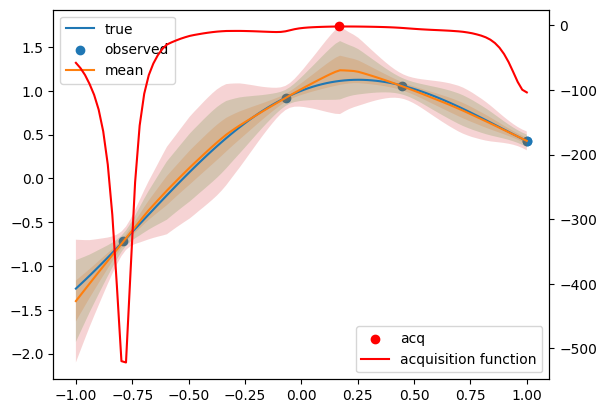

Adaptive HMC warmup: 100%|██████████| 100/100 [00:05<00:00, 17.54it/s]


Finished first warmup with ε=[0.07054803 0.03511192 0.01747529 0.01519911] and L=[ 284 1616  748 1253], d=[3.4646106 6.060851  2.8311858 1.7335168], logp=[-19.338955 -35.534447 -29.211313 -26.158619]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:06<00:00, 16.43it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.31584412, 0.30156663, 0.28897622, 0.2724637 ], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.0035214 , 0.08512723, 0.05602576, 0.04423523], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.00433005, 0.10959291, 0.07701024, 0.05892869], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.00261427, 0.05377511, 0.03091812, 0.03007812], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.00307316, 0.01438344, 0.01291805, 0.00613731], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:06<00:00, 16.11it/s]


Finished second warmup with ε=[1.         0.03053854 0.03053854 0.21544339] and L=[1858 1616  768 1152], d=[7390.827      49.565403   74.13309   436.41507 ], logp=[-31.607445   -8.745384   -6.3094587  -1.4746782]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:06<00:00, 14.77it/s]


acceptance rate: 0.024748368
{'x': Array(0.16947484, dtype=float32)}
means: (100,) [-1.241807   -1.1927931  -1.1436932  -1.0943162  -1.0444169  -0.99369574
 -0.9418156  -0.8899041  -0.8379629  -0.7860149  -0.73425686 -0.6826655
 -0.6310743  -0.57948303 -0.52804095 -0.47661352 -0.42537948 -0.3743293
 -0.3229313  -0.26475048 -0.20629165 -0.14809029 -0.09067198 -0.03299683
  0.02469358  0.08171996  0.1375978   0.19246845  0.24726203  0.30201444
  0.3564947   0.41077307  0.4543617   0.49546835  0.53544223  0.5735474
  0.61144537  0.6490727   0.6864018   0.7207057   0.751705    0.7805086
  0.80891144  0.83700573  0.86497486  0.89285564  0.9205119   0.9481303
  0.97564703  0.99619895  1.0150514   1.0338011   1.0525329   1.071185
  1.0842212   1.0895493   1.0946574   1.0996507   1.1046442   1.1096374
  1.1146306   1.1196067   1.1244955   1.1292435   1.1307378   1.1259283
  1.1176437   1.1086875   1.0969126   1.0851377   1.0733627   1.0615667
  1.0496844   1.037682    1.0256766   1.013671    1

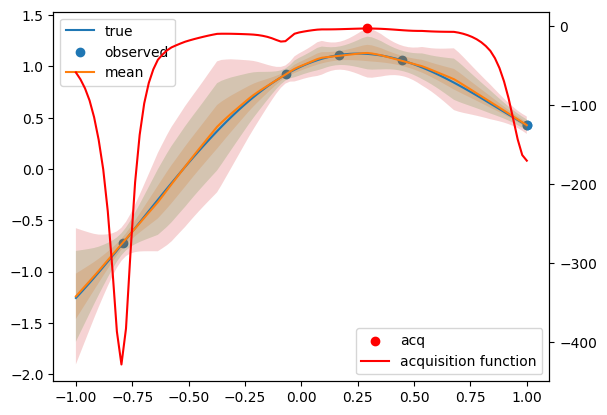

Adaptive HMC warmup: 100%|██████████| 100/100 [00:05<00:00, 19.68it/s]


Finished first warmup with ε=[0.00284804 0.00497702 0.03053854 0.00572237] and L=[1556 1071  546 1717], d=[3.1907187 2.4334307 1.8560222 3.3196294], logp=[-10.942533  -9.808575 -32.240906 -27.46745 ]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:05<00:00, 18.28it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.263088  , 0.21479796, 0.29086095, 0.26733947], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.0072131 , 0.00463579, 0.06327225, 0.01567837], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.01014745, 0.00664715, 0.07880381, 0.02105211], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.0064658 , 0.00458702, 0.0427301 , 0.00986189], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.0021574 , 0.00400454, 0.01818925, 0.0039951 ], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:05<00:00, 19.69it/s]


Finished second warmup with ε=[0.2848038  0.2477077  0.16297501 0.1072267 ] and L=[1434 1858  607 1596], d=[8252.504   2335.6333   520.18823  222.91078], logp=[-10.167364 -11.514487  -9.736652  10.080183]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:05<00:00, 17.09it/s]


acceptance rate: 0.077744536
{'x': Array(0.24402916, dtype=float32)}
means: (100,) [-1.3293632  -1.270251   -1.211027   -1.1519358  -1.0928913  -1.0340174
 -0.9752538  -0.9167187  -0.85829    -0.79997236 -0.7417458  -0.6836371
 -0.62551534 -0.5673776  -0.5094464  -0.45167923 -0.39407286 -0.33662218
 -0.27941042 -0.22227542 -0.16520461 -0.10838374 -0.0519269   0.00439617
  0.06058459  0.11670695  0.17269899  0.22842762  0.2702119   0.3074255
  0.3446173   0.38180137  0.41884193  0.45560986  0.49204886  0.5282597
  0.5642322   0.60009706  0.63583     0.6713851   0.7067792   0.741951
  0.7770851   0.8122247   0.847319    0.88236874  0.91726196  0.95209074
  0.9868615   1.0211061   1.0503578   1.0630835   1.0742993   1.0829375
  1.0902306   1.0969555   1.1033093   1.1094655   1.1154588   1.1202257
  1.1201028   1.1198039   1.1194717   1.1190503   1.11835     1.1174654
  1.1163695   1.1139007   1.1069647   1.0964198   1.0856558   1.0718325
  1.056001    1.0401587   1.0241569   1.008124    0

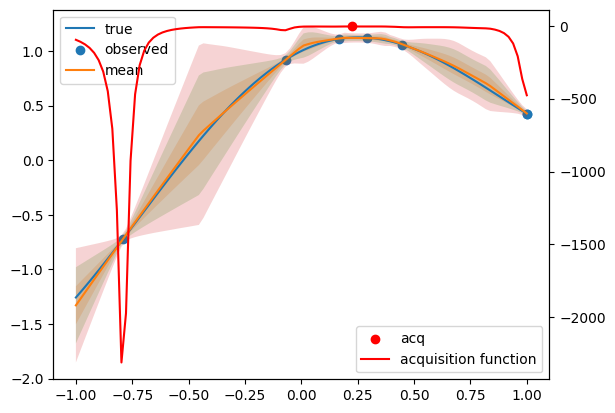

Adaptive HMC warmup: 100%|██████████| 100/100 [00:03<00:00, 25.46it/s]


Finished first warmup with ε=[0.05336699 0.00284804 0.01321941 0.01747529] and L=[ 324 1939 1051  809], d=[1.3795438 1.1458031 1.6679426 1.4093095], logp=[-20.30618     1.1628492   2.475592  -17.524887 ]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:04<00:00, 21.53it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.3427022 , 0.27607316, 0.34151462, 0.29175192], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.02070745, 0.00398686, 0.00433032, 0.0267264 ], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.02708514, 0.0069034 , 0.00632968, 0.0333962 ], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.01327102, 0.00308823, 0.00206821, 0.01514605], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.00760955, 0.00139665, 0.00053004, 0.0114386 ], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:03<00:00, 25.70it/s]


Finished second warmup with ε=[0.12328471 0.21544339 0.16297501 0.12328471] and L=[1334 1636 1475 1334], d=[ 406.03278 2854.9727  2591.0005   270.97592], logp=[ -5.296846 -14.916297  -6.446582  -3.273283]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:03<00:00, 25.59it/s]


acceptance rate: 0.32133353
{'x': Array(0.23351896, dtype=float32)}
means: (100,) [-1.2639304  -1.2105186  -1.1568462  -1.1031398  -1.0494004  -0.9957922
 -0.94339615 -0.8923529  -0.8413142  -0.79044676 -0.7395562  -0.68857586
 -0.63747025 -0.58629155 -0.5350437  -0.48380432 -0.43278274 -0.38170692
 -0.33073592 -0.27996206 -0.22975986 -0.18426307 -0.13904972 -0.09403629
 -0.04918889 -0.00447171  0.04005314  0.08447132  0.12877166  0.17258842
  0.21595138  0.25922373  0.3024225   0.34551185  0.388315    0.4310067
  0.47384593  0.5187747   0.5634535   0.60808957  0.6526477   0.6971458
  0.74149686  0.7856244   0.8295958   0.8733838   0.9169949   0.9606053
  1.0038366   1.0459441   1.0832354   1.0936428   1.0984664   1.1021458
  1.1053153   1.1081297   1.1105771   1.1128308   1.1150076   1.1171662
  1.1190158   1.120142    1.1209592   1.1213003   1.1211743   1.121042
  1.1207854   1.1199504   1.1178877   1.1098264   1.0903761   1.0697575
  1.0489985   1.0281396   1.0071677   0.9860656   0

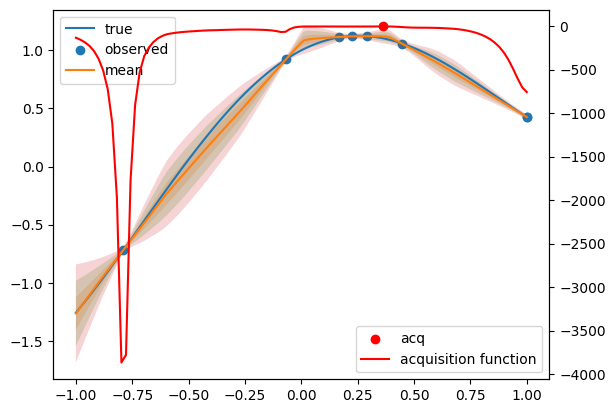

Adaptive HMC warmup: 100%|██████████| 100/100 [00:05<00:00, 18.34it/s]


Finished first warmup with ε=[0.00081113 0.01519911 0.02310131 0.00432876] and L=[ 930 1233  627 1031], d=[1.3261065 0.8324063 0.7789378 1.0339206], logp=[ 3.2174497  -0.46954525  0.8687774  -3.7916152 ]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:04<00:00, 24.47it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.21846786, 0.19237496, 0.30732524, 0.26260304], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.003582  , 0.00604572, 0.00973082, 0.00749008], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.00562797, 0.00919342, 0.01444349, 0.01141208], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.00162847, 0.00212779, 0.00361952, 0.00555174], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.00101594, 0.00119858, 0.00140544, 0.00281809], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:05<00:00, 18.07it/s]


Finished second warmup with ε=[0.43287593 0.32745472 0.1417474  0.2848038 ] and L=[ 768 1455 1697 1253], d=[3905.0442 9293.947  1781.2374 3421.4285], logp=[ -0.14575112 -10.287991    13.815269    -9.90825   ]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:05<00:00, 17.95it/s]


acceptance rate: 0.032061704
{'x': Array(0.2027272, dtype=float32)}
means: (100,) [-1.1893961  -1.1458137  -1.1019804  -1.0581119  -1.0140342  -0.9698574
 -0.9246146  -0.87898636 -0.8324304  -0.7850498  -0.73743653 -0.68977964
 -0.6420567  -0.59434575 -0.5465569  -0.49874362 -0.45111498 -0.40346915
 -0.35581192 -0.30815467 -0.26049778 -0.2128123  -0.16511734 -0.11742306
 -0.06977876 -0.02214387  0.02549161  0.07312643  0.12076166  0.16839942
  0.21613312  0.26377505  0.31141964  0.3590648   0.40643576  0.45332634
  0.499616    0.5456919   0.59117687  0.6366291   0.68081844  0.72060615
  0.760239    0.799736    0.8392131   0.87862164  0.9180626   0.95749664
  0.9960453   1.0256499   1.053256    1.0729731   1.0806847   1.0864203
  1.0920743   1.0976379   1.1031984   1.1087532   1.1142013   1.1192019
  1.120906    1.1205816   1.1196868   1.1180141   1.1161051   1.1141505
  1.1108512   1.1056089   1.1003268   1.0939234   1.0844897   1.0695212
  1.0538908   1.0382026   1.0224905   1.0066862

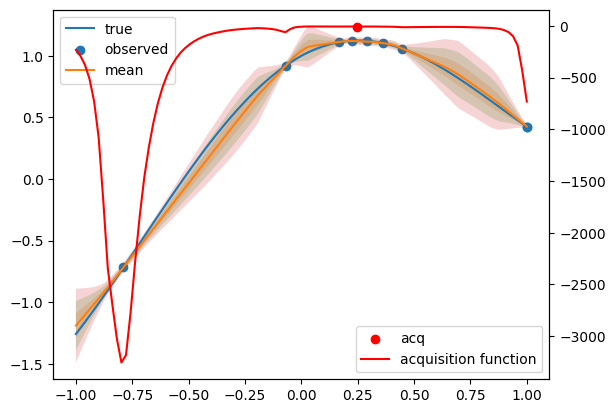

Adaptive HMC warmup: 100%|██████████| 100/100 [00:05<00:00, 16.94it/s]


Finished first warmup with ε=[0.00247708 0.03511192 0.00572237 0.00247708] and L=[1939  708  970 1697], d=[1.0635853  0.93060166 0.90196323 0.84452283], logp=[ 2.983197  -1.2984022  2.2505732 -1.8725252]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:06<00:00, 14.68it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.23845081, 0.37669778, 0.25852218, 0.23485471], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.00474167, 0.01505566, 0.01061687, 0.00415779], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.00742875, 0.01683808, 0.01590343, 0.00580513], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.0031445 , 0.00429097, 0.00613361, 0.00280125], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.00138668, 0.00276739, 0.00345235, 0.00219322], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:05<00:00, 17.69it/s]


Finished second warmup with ε=[0.12328471 0.1417474  0.2848038  0.08111306] and L=[2000 2000 1798 1919], d=[2235.8606 1559.0723 2609.0784  961.7263], logp=[13.180534   2.8071702  3.6189363 18.028658 ]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:07<00:00, 14.21it/s]


acceptance rate: 0.36522236
{'x': Array(0.23011684, dtype=float32)}
means: (100,) [-1.3535888  -1.2909874  -1.2286232  -1.1663405  -1.1045085  -1.043542
 -0.983352   -0.9232539  -0.8632366  -0.8033537  -0.74346095 -0.6837262
 -0.6240032  -0.5643167  -0.50522304 -0.44620684 -0.38725758 -0.32842445
 -0.26986492 -0.21148941 -0.15347216 -0.09591509 -0.0387958   0.01811923
  0.07485987  0.13080797  0.18605798  0.2402808   0.29159746  0.33696795
  0.37738395  0.41677025  0.45503852  0.49301088  0.53040564  0.5671527
  0.60344654  0.63893646  0.67326874  0.70691705  0.7398737   0.7720693
  0.8035047   0.8341859   0.8632343   0.8915312   0.918979    0.9461668
  0.9730787   0.9994642   1.0254326   1.0476403   1.0600249   1.0714608
  1.0821606   1.0917965   1.1006649   1.1090554   1.1167222   1.1222495
  1.1225667   1.1218812   1.1209552   1.1196668   1.117685    1.1151572
  1.111375    1.1063619   1.1010158   1.0946782   1.0860113   1.0717543
  1.0556886   1.0393513   1.0227182   1.0059321   0.

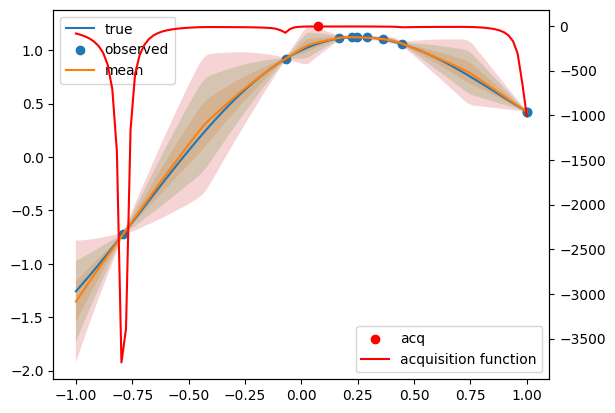

Adaptive HMC warmup: 100%|██████████| 100/100 [00:06<00:00, 15.10it/s]


Finished first warmup with ε=[0.00327455 0.00572237 0.00123285 0.01321941] and L=[2000 1515 1717  264], d=[0.9613942  0.7446643  0.9588807  0.50697285], logp=[ 8.201757   2.7710445  8.206035  -2.416463 ]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:08<00:00, 12.24it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.21587804, 0.2626063 , 0.21165903, 0.17323369], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.00686394, 0.01273632, 0.00294937, 0.00161318], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.01043409, 0.01750177, 0.00489467, 0.00244157], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.00339839, 0.00449201, 0.00187079, 0.00118693], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.00175818, 0.00202225, 0.00092565, 0.00038302], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:06<00:00, 15.31it/s]


Finished second warmup with ε=[0.12328471 0.21544339 0.21544339 0.2477077 ] and L=[1334 1596  930 1475], d=[1991.3925 1537.652  4794.519  4320.5454], logp=[ 9.888272   5.108164   7.6929235 -5.7163777]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:06<00:00, 15.43it/s]


acceptance rate: 0.43671533
{'x': Array(0.24510527, dtype=float32)}
means: (100,) [-1.2341522  -1.1853997  -1.1364852  -1.0869042  -1.0372047  -0.9873149
 -0.9373491  -0.8869294  -0.8376956  -0.78830534 -0.7385347  -0.68864334
 -0.63841224 -0.58778805 -0.5369914  -0.48599195 -0.4344596  -0.3818982
 -0.32930142 -0.27674994 -0.22383925 -0.17062363 -0.11592919 -0.06105991
 -0.00779181  0.04423565  0.09530729  0.1453875   0.19457851  0.24285884
  0.29110146  0.33839524  0.3836867   0.42818674  0.47159803  0.51340103
  0.55348164  0.59314847  0.6325604   0.67127913  0.709531    0.7469523
  0.78307784  0.81818515  0.8525615   0.8861204   0.9191396   0.95176387
  0.9812928   0.99999434  1.016217    1.0317827   1.0466485   1.0610309
  1.0751776   1.0886296   1.0991493   1.1063851   1.1126163   1.1182164
  1.122288    1.1239809   1.1242605   1.1233665   1.121106    1.117879
  1.1131202   1.1068242   1.1000983   1.0931658   1.0840412   1.0688276
  1.0519292   1.0345666   1.0167942   0.99870014  

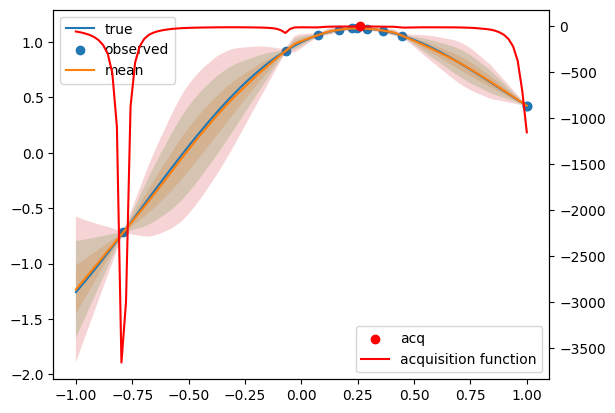

Adaptive HMC warmup: 100%|██████████| 100/100 [00:06<00:00, 15.41it/s]


Finished first warmup with ε=[0.01       0.01747529 0.00497702 0.01519911] and L=[1212  688  829  708], d=[0.3685629  0.51152873 0.7736071  0.4864892 ], logp=[33.694084  32.129436   1.7779366  7.246969 ]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:04<00:00, 20.23it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.23625244, 0.19923499, 0.23282504, 0.26567224], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.00069397, 0.00094803, 0.00918149, 0.00396054], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.00117193, 0.00215701, 0.01270826, 0.00552762], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.000448  , 0.00041113, 0.00364709, 0.00248653], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.00052768, 0.00017736, 0.00422858, 0.00132388], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:06<00:00, 14.64it/s]


Finished second warmup with ε=[0.2848038  0.37649357 0.21544339 0.21544339] and L=[1697 1354 1778  789], d=[ 7114.7544 13682.397   4263.8267  1407.5164], logp=[25.226206 27.612514 19.219229 16.876984]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:07<00:00, 13.89it/s]


acceptance rate: 0.33736342
{'x': Array(0.26058757, dtype=float32)}
means: (100,) [-1.2344673  -1.184675   -1.1349062  -1.085139   -1.0353855  -0.98563945
 -0.93589646 -0.88613826 -0.8363683  -0.78657436 -0.7372729  -0.68849975
 -0.6396961  -0.590844   -0.54189813 -0.49289262 -0.44383106 -0.39474854
 -0.3456393  -0.2964771  -0.24725845 -0.19796742 -0.14846115 -0.09741682
 -0.04620672  0.00493113  0.05579764  0.10584947  0.15436117  0.20211822
  0.24904642  0.2953045   0.34072807  0.38586158  0.43072814  0.47521475
  0.5191135   0.56252575  0.6053825   0.6472449   0.6884158   0.7284384
  0.76738507  0.8059756   0.84416306  0.88146996  0.91822314  0.95244306
  0.9818858   0.999839    1.0162567   1.0316361   1.0464569   1.0608186
  1.0746784   1.0879087   1.0984596   1.1061021   1.113075    1.1198846
  1.1234487   1.1245422   1.1243689   1.1232048   1.1211345   1.1184932
  1.1138089   1.1067994   1.0995176   1.091823    1.0828025   1.0690603
  1.0542032   1.0387554   1.02283     1.0064079

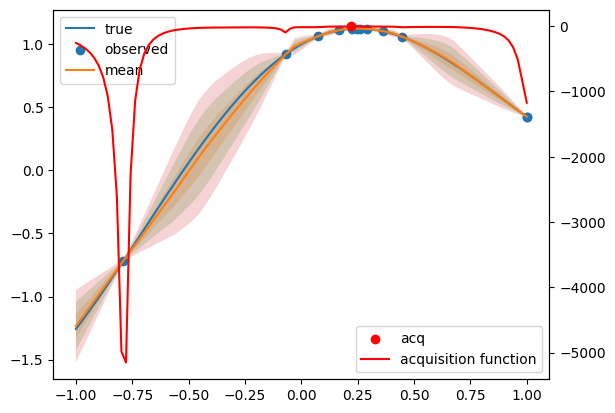

Adaptive HMC warmup: 100%|██████████| 100/100 [00:06<00:00, 15.30it/s]


Finished first warmup with ε=[0.00869749 0.00376494 0.01747529 0.00141747] and L=[1354 1959  486 2000], d=[0.46855634 0.5976446  0.8093875  0.20946068], logp=[19.692768  3.363449 20.555004 12.494565]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:08<00:00, 11.94it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.17952745, 0.21900614, 0.19977316, 0.21166426], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.00228047, 0.00863804, 0.00274258, 0.00142932], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.00339024, 0.01175699, 0.00463812, 0.00205739], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.00189486, 0.0032418 , 0.00140589, 0.00141735], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.0010013 , 0.00180341, 0.00058568, 0.00066774], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:06<00:00, 15.06it/s]


Finished second warmup with ε=[0.21544339 0.08111306 0.21544339 0.18738174] and L=[1374 1798 1556 1697], d=[1413.3733 2122.4116 3190.9524 6071.021 ], logp=[31.431215 31.100044 33.62395  27.46087 ]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:07<00:00, 13.32it/s]


acceptance rate: 0.09230454
{'x': Array(0.23817325, dtype=float32)}
means: (100,) [-1.4229398  -1.3564552  -1.289492   -1.2222999  -1.1549846  -1.0876004
 -1.020129   -0.9525801  -0.8846196  -0.81627315 -0.7476039  -0.6787129
 -0.60971385 -0.54065067 -0.47156057 -0.40240738 -0.33222297 -0.2616686
 -0.20428817 -0.15972091 -0.11535911 -0.07090342 -0.02638198  0.01822597
  0.06295802  0.10743286  0.15171583  0.1960273   0.24025849  0.2844339
  0.32843474  0.37210032  0.4149993   0.45485014  0.4936565   0.53197455
  0.56975865  0.6074358   0.6449265   0.68227845  0.71946204  0.7556252
  0.7912538   0.8252103   0.8568663   0.88802075  0.9188494   0.9492088
  0.97921795  1.0005199   1.016363    1.031108    1.0457637   1.0603747
  1.0749596   1.0892909   1.0982056   1.1055801   1.1127837   1.119907
  1.1236616   1.1245027   1.1243155   1.1232613   1.1209328   1.1169461
  1.112369    1.106245    1.1001183   1.0939579   1.0871075   1.073136
  1.0522027   1.0312494   1.0102592   0.989268    0.96

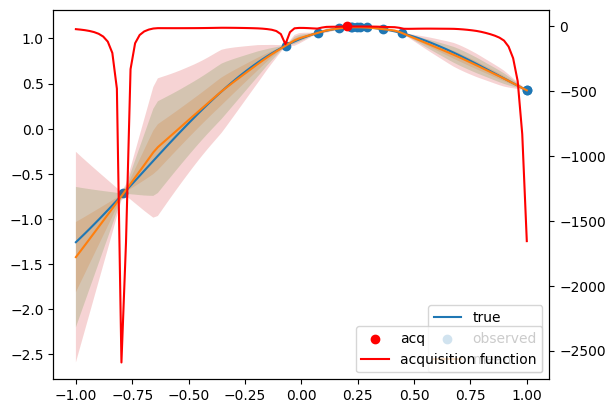

Adaptive HMC warmup: 100%|██████████| 100/100 [00:05<00:00, 17.43it/s]


Finished first warmup with ε=[0.02009233 0.02310131 0.01       0.00187382] and L=[1253  345  526 1414], d=[0.2981888  0.42209274 0.33786425 0.32486796], logp=[30.836634 11.421713 25.161852 26.238024]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:04<00:00, 20.51it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.18800318, 0.18611531, 0.17575635, 0.21113102], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.00086739, 0.004958  , 0.0014884 , 0.00409967], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.00132085, 0.00816425, 0.00221223, 0.00560348], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.00048203, 0.00201565, 0.00135001, 0.00143413], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.00029686, 0.00281841, 0.00069044, 0.00101226], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:05<00:00, 17.11it/s]


Finished second warmup with ε=[0.43287593 0.21544339 0.12328471 0.18738174] and L=[1212 1414 1818 1112], d=[5353.197  2955.327  2856.9258 3288.6116], logp=[40.36284  36.413036 45.013897 27.052526]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:06<00:00, 15.60it/s]


acceptance rate: 0.25343996
{'x': Array(0.24639857, dtype=float32)}
means: (100,) [-1.284431   -1.2281535  -1.1720048  -1.1159183  -1.0599229  -1.0039449
 -0.9486409  -0.89512753 -0.8432735  -0.79214364 -0.7401075  -0.68796676
 -0.6357182  -0.58346355 -0.5312768  -0.4791736  -0.42702442 -0.37467587
 -0.32230434 -0.26993307 -0.21756199 -0.16519782 -0.11287183 -0.06069858
 -0.0085939   0.04335526  0.09529413  0.14723505  0.19914712  0.25041705
  0.30120304  0.35091677  0.39958778  0.44773024  0.49492455  0.5400178
  0.58211386  0.620458    0.65763944  0.6936554   0.72911316  0.7635722
  0.79768974  0.8309986   0.8613361   0.8906059   0.91890836  0.9467783
  0.97191894  0.99022466  1.0082397   1.0257149   1.0429616   1.0601605
  1.0772451   1.093903    1.1044458   1.1099935   1.1150122   1.1189291
  1.1210641   1.123023    1.1246834   1.1251587   1.1222372   1.1182705
  1.1127539   1.1062361   1.0996188   1.0929502   1.0860344   1.0709999
  1.0516483   1.0321214   1.0124162   0.9923808   

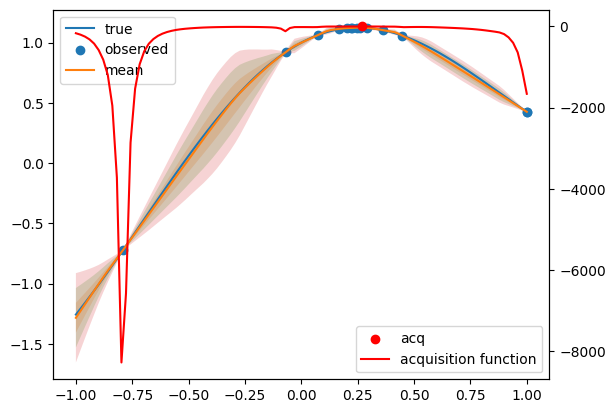

Adaptive HMC warmup: 100%|██████████| 100/100 [00:06<00:00, 16.37it/s]


Finished first warmup with ε=[0.01       0.02009233 0.01       0.00432876] and L=[1192  345  647  970], d=[0.2628964  0.48752356 0.2707563  0.17103252], logp=[33.166462 23.71313  42.67755  21.75393 ]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:04<00:00, 22.60it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.26887542, 0.25749165, 0.20463413, 0.16732872], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.0030549 , 0.00680523, 0.00237948, 0.00242161], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.00546537, 0.01091601, 0.00403105, 0.00366448], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.00135509, 0.00134398, 0.00082686, 0.00178987], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.00171964, 0.0051268 , 0.00051574, 0.0011984 ], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:06<00:00, 15.43it/s]


Finished second warmup with ε=[0.16297501 0.43287593 0.21544339 0.18738174] and L=[ 990  546 2000 2000], d=[ 532.4666 1151.205  2787.19   1346.5083], logp=[52.443153 47.216114 39.427658 39.549026]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:07<00:00, 12.65it/s]


acceptance rate: 0.017065212
{'x': Array(0.2719065, dtype=float32)}
means: (100,) [-1.3319026  -1.2729836  -1.2140642  -1.1551456  -1.0962265  -1.0373073
 -0.97838825 -0.9194691  -0.8605499  -0.80163085 -0.7427121  -0.683793
 -0.6248738  -0.5655651  -0.5061341  -0.44670397 -0.38727495 -0.32784602
 -0.2684172  -0.20898943 -0.1500769  -0.09188248 -0.03388206  0.02342658
  0.08026414  0.13698488  0.19351688  0.24983878  0.2940695   0.33570197
  0.3772602   0.41834205  0.45917496  0.49984497  0.5339159   0.567144
  0.60037214  0.6336003   0.6668286   0.7000567   0.7332849   0.7665144
  0.799745    0.8329765   0.86620796  0.8932897   0.91949934  0.94473785
  0.96997625  0.98891884  1.0063035   1.0236518   1.0409793   1.0582741
  1.0755584   1.0917835   1.1018313   1.1079935   1.1140491   1.1194122
  1.1220528   1.12327     1.1244578   1.1247375   1.1218134   1.1181115
  1.1129408   1.1057862   1.0988513   1.0921491   1.085456    1.0709829
  1.0509092   1.0306991   1.0095817   0.9877767   0.

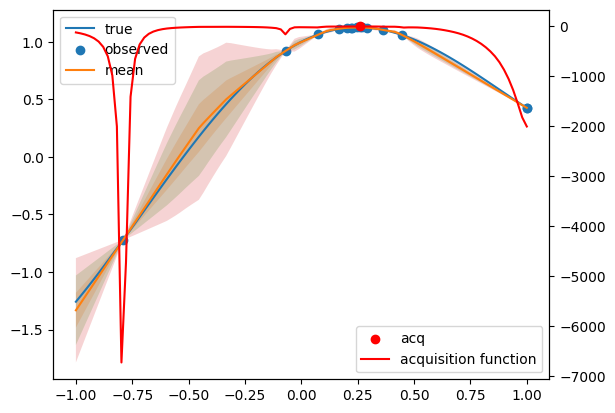

Adaptive HMC warmup: 100%|██████████| 100/100 [00:05<00:00, 19.46it/s]


Finished first warmup with ε=[0.01149757 0.01747529 0.01149757 0.00081113] and L=[1132  365  466 1273], d=[0.15397196 0.40566802 0.36734068 0.3045135 ], logp=[55.509216 34.949093 24.286734 27.403093]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:04<00:00, 24.26it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.21697251, 0.18077034, 0.17623438, 0.20424202], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.00065413, 0.00182795, 0.00203542, 0.00170919], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.00106342, 0.00494771, 0.00309691, 0.00257659], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.00030148, 0.00087449, 0.00193774, 0.00097595], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.00040057, 0.00027041, 0.00056426, 0.00050119], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:05<00:00, 18.82it/s]


Finished second warmup with ε=[0.32745472 0.32745472 0.2477077  0.2477077 ] and L=[1434 1939 1778 1919], d=[ 3540.2527 11036.442   8864.7295  3893.1394], logp=[68.95196  24.455622 29.241125 39.837868]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:06<00:00, 15.90it/s]


acceptance rate: 0.07990299
{'x': Array(0.26286185, dtype=float32)}
means: (100,) [-1.3573297  -1.2956685  -1.2340308  -1.1723934  -1.1107804  -1.0492008
 -0.9876211  -0.92605346 -0.8645866  -0.80330783 -0.74343693 -0.6836801
 -0.6240441  -0.56437874 -0.50465316 -0.4449386  -0.385221   -0.32577232
 -0.26676008 -0.20794556 -0.14973885 -0.09225084 -0.03570187  0.02055967
  0.07537385  0.12689386  0.17076243  0.21453156  0.25808308  0.30129582
  0.3443462   0.38684145  0.42630708  0.46461394  0.5017927   0.5387246
  0.5754711   0.6119344   0.6481585   0.6839616   0.71921337  0.7539188
  0.7881413   0.8215188   0.85425323  0.8867288   0.9188623   0.94912964
  0.97256666  0.9899914   1.00727     1.024482    1.0417686   1.0590569
  1.0762312   1.0922662   1.1017234   1.1079774   1.114008    1.1189935
  1.1220063   1.1245319   1.1248689   1.1237522   1.1213852   1.1180751
  1.113006    1.1065114   1.1000091   1.0934788   1.0860077   1.0703616
  1.0521736   1.0339843   1.0157508   0.9974839   

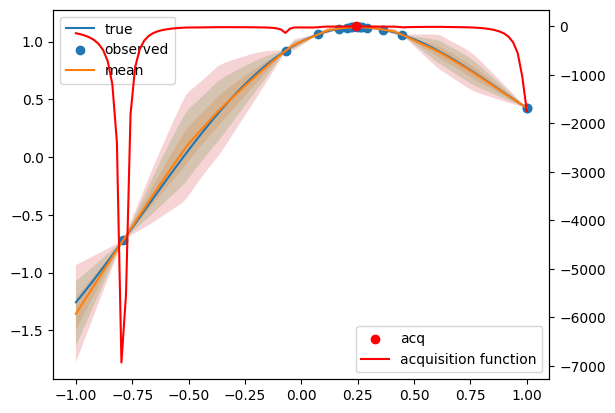

Adaptive HMC warmup: 100%|██████████| 100/100 [00:06<00:00, 14.66it/s]


Finished first warmup with ε=[0.00869749 0.02009233 0.03053854 0.00497702] and L=[1152  627  546 1112], d=[0.2250476  0.46777543 0.49015525 0.17577082], logp=[24.967905 69.246    52.2951   24.412106]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:04<00:00, 20.63it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.15662451, 0.23958796, 0.16320351, 0.23518956], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.00406253, 0.00069705, 0.00063753, 0.00209522], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.00671909, 0.00118673, 0.00096953, 0.00318787], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.00152545, 0.00029698, 0.00034   , 0.00221863], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.00127793, 0.00022564, 0.00025659, 0.00092365], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:06<00:00, 14.55it/s]


Finished second warmup with ε=[0.49770242 0.21544339 0.2477077  0.2848038 ] and L=[1596 1677 1273 1737], d=[5220.037  5240.489  1984.2324 2141.3142], logp=[51.41131  69.5003   64.722984 32.00442 ]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:07<00:00, 13.79it/s]


acceptance rate: 0.101858824
{'x': Array(0.2690146, dtype=float32)}
means: (100,) [-1.2763115  -1.222753   -1.1691948  -1.1156455  -1.062098   -1.0085506
 -0.955003   -0.90145653 -0.84795606 -0.79448116 -0.7410169  -0.6875561
 -0.63409585 -0.58064896 -0.52721137 -0.47377822 -0.4203501  -0.36693785
 -0.31353062 -0.26013458 -0.20674889 -0.153374   -0.10000499 -0.04664031
  0.00672069  0.060076    0.11340237  0.16563644  0.20491678  0.24419147
  0.2834647   0.3227361   0.36200312  0.40139902  0.44109794  0.48079696
  0.52049613  0.5601949   0.5998924   0.6395828   0.67926055  0.7189337
  0.7586054   0.79827714  0.83794874  0.8776207   0.9172917   0.9569594
  0.99414593  1.0119963   1.0246171   1.0372279   1.0498384   1.062449
  1.0750585   1.0876645   1.0982352   1.1056862   1.1122718   1.1182897
  1.1224151   1.1256166   1.1257523   1.1240764   1.1202632   1.1152918
  1.1103228   1.105363    1.1004157   1.0954858   1.0905573   1.0739365
  1.0507302   1.027526    1.0043243   0.98112273  0

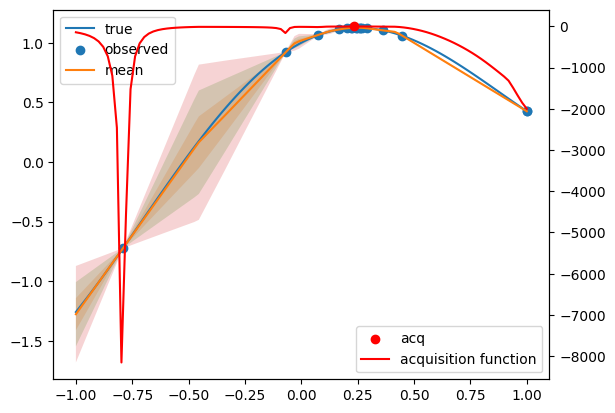

Adaptive HMC warmup: 100%|██████████| 100/100 [00:06<00:00, 15.21it/s]


Finished first warmup with ε=[0.01149757 0.01747529 0.00572237 0.00215443] and L=[1273  385 1858 1091], d=[0.15615301 0.5723638  0.5405261  0.0734489 ], logp=[66.950806 49.721855 61.621586 45.95387 ]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.20361638, 0.22927783, 0.17225644, 0.16069315], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.00112441, 0.00128058, 0.00045747, 0.00126699], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.0017721 , 0.00189034, 0.00071108, 0.00191289], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.0003698 , 0.00064417, 0.00027748, 0.00079133], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.00047351, 0.00092289, 0.00013599, 0.0003132 ], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:06<00:00, 14.45it/s]


Finished second warmup with ε=[0.2848038  0.18738174 0.2848038  0.49770242] and L=[1535 1838 1313 2000], d=[10042.435   3472.4348 14433.314   8424.375 ], logp=[60.41319 51.43441 66.95828 41.83479]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:07<00:00, 12.67it/s]


acceptance rate: 0.1429782
{'x': Array(0.25440073, dtype=float32)}
means: (100,) [-1.269699   -1.2158405  -1.1619914  -1.1081635  -1.0544652  -1.0016168
 -0.9492498  -0.89688325 -0.844558   -0.7922593  -0.73998976 -0.68775725
 -0.6355434  -0.5833333  -0.53114456 -0.47896057 -0.42677614 -0.3746157
 -0.32246256 -0.2703172  -0.2181721  -0.16602638 -0.11388132 -0.06174114
 -0.00969726  0.04193987  0.0931196   0.14068918  0.18564545  0.22857769
  0.27085754  0.31283635  0.35474676  0.39649984  0.43809885  0.47964546
  0.5209045   0.5618707   0.60249144  0.6427256   0.68269134  0.7224647
  0.7620308   0.80138516  0.8406211   0.87975484  0.91874707  0.95547694
  0.9900031   1.008231    1.0225743   1.0365105   1.0491328   1.0613291
  1.0731539   1.0847127   1.0945903   1.1028308   1.1108319   1.1178559
  1.1214103   1.1246235   1.1250122   1.1242626   1.1205919   1.116053
  1.1115141   1.1069753   1.1024367   1.0979186   1.0930842   1.0744574
  1.0512265   1.0279945   1.0047721   0.9815623   0

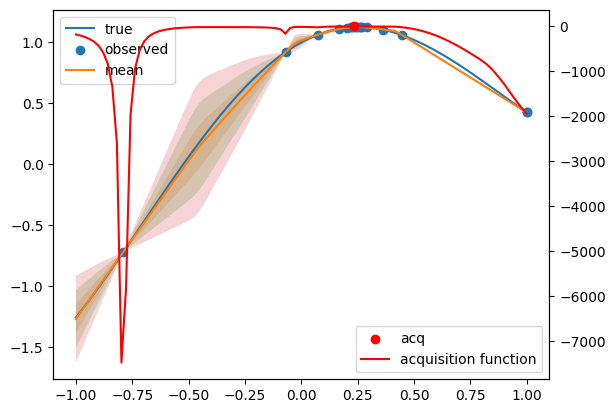

Adaptive HMC warmup: 100%|██████████| 100/100 [00:06<00:00, 15.91it/s]


Finished first warmup with ε=[0.00215443 0.01321941 0.00756463 0.00432876] and L=[1112  688  587 1172], d=[0.31788492 0.37967083 0.40634498 0.26110092], logp=[41.435577 67.933266 61.276997 68.077805]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:04<00:00, 21.60it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.15447156, 0.24276266, 0.1632648 , 0.24014394], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.00164087, 0.00131048, 0.00082537, 0.00044365], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.00263253, 0.00204398, 0.00120656, 0.00067737], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.00137886, 0.0004575 , 0.00038953, 0.00027593], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.00092853, 0.00066228, 0.00021806, 0.00012517], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:06<00:00, 14.70it/s]


Finished second warmup with ε=[0.12328471 0.18738174 0.2477077  0.1417474 ] and L=[1919 1576 1455 1858], d=[8483.646   4523.7026  6230.6636   930.07477], logp=[60.45943 60.47439 61.29455 87.09379]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:07<00:00, 13.16it/s]


acceptance rate: 0.23367
{'x': Array(0.26105738, dtype=float32)}
means: (100,) [-1.1941972  -1.1520901  -1.1095164  -1.0656955  -1.0210837  -0.9750545
 -0.92877114 -0.88216245 -0.8349954  -0.78703815 -0.7385837  -0.68982846
 -0.64106244 -0.5922984  -0.5435679  -0.49487892 -0.4462407  -0.39775908
 -0.3494944  -0.30238116 -0.2563079  -0.21034734 -0.16452649 -0.11878437
 -0.0730763  -0.0273701   0.01833272  0.0640204   0.10967044  0.15526335
  0.20082508  0.24611469  0.2912312   0.33620468  0.38108674  0.42592254
  0.47075754  0.51558393  0.5603801   0.6051491   0.6499104   0.6946449
  0.73934615  0.78403616  0.82865036  0.8731735   0.91757655  0.961936
  1.0058651   1.0209913   1.0312359   1.0414463   1.0516491   1.0618405
  1.0720321   1.0822235   1.0924149   1.1026063   1.1127979   1.1213263
  1.122704    1.1236753   1.1245397   1.1245183   1.1233685   1.1214255
  1.1159123   1.1067663   1.0975673   1.0883679   1.0791688   1.0675448
  1.0530314   1.038399    1.0231059   1.005803    0.9

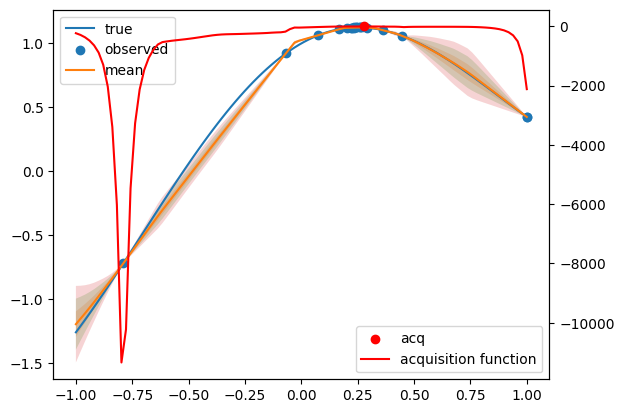

Adaptive HMC warmup: 100%|██████████| 100/100 [00:06<00:00, 15.88it/s]


Finished first warmup with ε=[0.01       0.00657933 0.00756463 0.00497702] and L=[ 728 1515  587 1233], d=[0.1919527  0.3727243  0.23908992 0.13300972], logp=[67.442924 76.13549  43.04823  49.589596]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:05<00:00, 16.75it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.17215374, 0.16547209, 0.1652901 , 0.17579994], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.00074163, 0.00094937, 0.00216363, 0.00142315], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.00106461, 0.00153321, 0.00337661, 0.00219113], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.00042424, 0.00032565, 0.00126242, 0.00092869], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.00022555, 0.00029813, 0.00038737, 0.00031088], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:07<00:00, 14.06it/s]


Finished second warmup with ε=[0.32745472 0.43287593 0.2477077  0.21544339] and L=[2000 2000 1878 1656], d=[4446.393  9093.652  4906.5264 3753.4202], logp=[81.783936 73.186905 41.626343 51.03092 ]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:08<00:00, 12.07it/s]


acceptance rate: 0.21360706
{'x': Array(0.24404907, dtype=float32)}
means: (100,) [-1.2860829  -1.2361385  -1.1861827  -1.1362648  -1.0811499  -1.0245719
 -0.968038   -0.91150254 -0.85503036 -0.798566   -0.74214596 -0.68573666
 -0.62925375 -0.57277566 -0.5162459  -0.4597033  -0.4032737  -0.3473355
 -0.29184407 -0.23727241 -0.18346427 -0.13023935 -0.07725064 -0.02428436
  0.02868343  0.08166262  0.1346464   0.18646206  0.23651193  0.2863891
  0.3362651   0.3860742   0.43524188  0.48184493  0.5254727   0.5679182
  0.60536194  0.63959867  0.6737694   0.70769453  0.7404132   0.7726805
  0.80396175  0.83315873  0.8618448   0.8904766   0.9191794   0.94784904
  0.9757347   0.997286    1.0161848   1.0310448   1.0459117   1.06079
  1.0756642   1.0905105   1.1013415   1.107725    1.1137936   1.1191242
  1.1223441   1.1241294   1.124785    1.123067    1.1195662   1.1159911
  1.1124014   1.1088061   1.1052036   1.1014603   1.0941311   1.0731039
  1.0498573   1.0266123   1.0033665   0.98012084  0.9

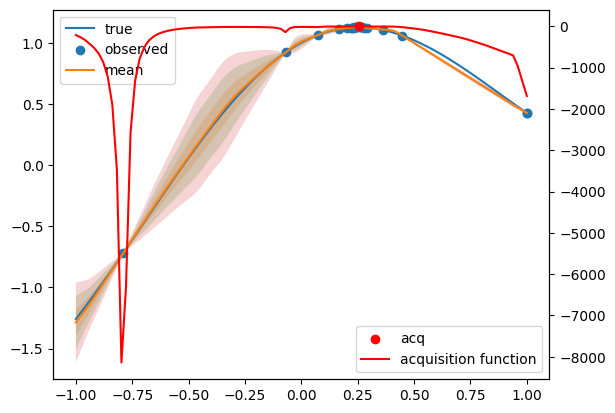

Adaptive HMC warmup: 100%|██████████| 100/100 [00:06<00:00, 14.88it/s]


Finished first warmup with ε=[0.01       0.02009233 0.02009233 0.00497702] and L=[ 728  385 1112 1233], d=[0.22542506 0.695033   0.47552955 0.21668571], logp=[59.12388  48.176773 35.22142  64.055214]
Starting initial chain for mass adaptation...


Running for 100 iterations: 100%|██████████| 100/100 [00:05<00:00, 19.55it/s]


Updated mass metric.
new metric: DictionaryMetric(metrics={'log_sigma': ScalarMetric(a=Array([0.19246154, 0.15915498, 0.21616773, 0.25629336], dtype=float32)), 'params': DictionaryMetric(metrics={'0.bias': ScalarMetric(a=Array([0.0010075 , 0.00227307, 0.00762636, 0.00097167], dtype=float32)), '0.weight': ScalarMetric(a=Array([0.00152663, 0.00483295, 0.01104696, 0.00148133], dtype=float32)), '2.bias': ScalarMetric(a=Array([0.00076863, 0.00108562, 0.00185546, 0.00064597], dtype=float32)), '2.weight': ScalarMetric(a=Array([0.00027459, 0.00735671, 0.00882225, 0.00027632], dtype=float32))})})


Adaptive HMC warmup: 100%|██████████| 100/100 [00:06<00:00, 15.38it/s]


Finished second warmup with ε=[0.18738174 0.2848038  0.0464159  0.07054803] and L=[1818 1515 1919 1858], d=[8605.823  3198.538   966.7814  560.2631], logp=[52.20011 91.65699 75.25062 80.7425 ]
Finally sampling...


Running for 100 iterations: 100%|██████████| 100/100 [00:07<00:00, 13.20it/s]

acceptance rate: 0.46964994


In [3]:
if __name__ == '__main__':

    def true_f(x):
        return jnp.sin(x) + jnp.cos(2*x)#.squeeze(-1)
    
    opt = Optim([SpaceItem('x', -1, 1)], objective='max', heuristic='ei')

    params = opt.suggest({})

    val = true_f(params['x'])
    opt.notify(params, val)
    opt.infer()

    for i in range(20):
        params = opt.suggest({})

        print(opt.suggestbest({}))

        # print('sigmas:', jnp.exp(opt.chains['log_sigma']))

        xs = jnp.linspace(-1, 1, 100)
        ys = true_f(xs)

        xs_ = jax.vmap(opt.space.normalize)({'x':xs})
        mean, std = opt.fitted.predict(xs_)

        # print('aaa:', (v_fwd(opt.model, opt.chains, opt.space.normalize(opt.trials[0].params)[None]) - true_f(opt.trials[0].params['x'])).square())

        print('means:', mean.shape, mean)
        print('stds:', std.shape, std)

        fig, ax1 = plt.subplots()
        ax1.plot(xs, ys, label='true')
        ax1.scatter([t.params['x'] for t in opt.trials], [t.value for t in opt.trials], label='observed')
        ax1.plot(xs, mean, label='mean')
        ax1.fill_between(xs, mean - 1*std, mean + 1*std, alpha=0.2)
        ax1.fill_between(xs, mean - 2*std, mean + 2*std, alpha=0.2)
        ax1.fill_between(xs, mean - 3*std, mean + 3*std, alpha=0.2)

        ax2 = ax1.twinx()
        ax2.scatter(params['x'][None], opt.acf(opt.space.normalize(params))[None], label='acq', color='red')
        ax2.plot(xs, jax.vmap(lambda x: opt.acf(opt.space.normalize({'x': x})))(xs), label='acquisition function', color='red')
        
        ax1.legend()
        ax2.legend()
        plt.show()

        val = true_f(params['x'])
        opt.notify(params, val)
        opt.infer()
